In [35]:
import pandas as pd
import numpy as np
import requests

import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 

import plotly.express as px
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

import spacy
import pickle

# import imageio
import folium
# import folium.plugins as plugins
# from mpl_toolkits.basemap import Basemap

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [2]:
from functions_for_analysis.plotting_functions import *
from functions_for_analysis.data_analysis_function import *

In [14]:
business_dir = "./yelp_csv/yelp_business.csv"
biz_attrs_dir = "./yelp_csv/yelp_business_attributes.csv"
business_hours_dir = "./yelp_csv/yelp_business_hours.csv"
check_in_dir = "./yelp_csv/yelp_checkin.csv"
reviews_dir = "./yelp_csv/yelp_review.csv"
tip_dir = "./yelp_csv/yelp_tip.csv"
user_dir = "./yelp_csv/yelp_user.csv"

In [482]:
test_b = pd.read_csv(business_dir)

In [490]:
test_b.loc[test_b['city']=="Las Vegas"].business_id.value_counts

<bound method IndexOpsMixin.value_counts of 6         kCoE3jvEtg6UVz5SOD3GVw
7         OD2hnuuTJI9uotcKycxg1A
26        VBHEsoXQb2AQ76J9l8h1uQ
41        1Jp_hmPNUZArNqzpbm7B0g
48        DPQnTnNw2PJj7DdENM98Cw
                   ...          
174539    swjz4q8gI79Ndg4APuHEUA
174545    pUhU5ohYv65g8B47dTXAKA
174546    sH9WsMj8sNTTSAUWv4UEEg
174552    9ouC6BpmjFpLfHeQnLQqng
174556    n9a-3YhibkMDUEgncIivHg
Name: business_id, Length: 26775, dtype: object>

In [15]:
tip = pd.read_csv(tip_dir)

In [18]:
tip_steak = pd.merge(tip, steakhouses, 
              on='business_id',
              how='right')

In [12]:
steakhouses.head(4)

business_id                                     name  \
1560  BG8lvZoPTrPJqcvTh-ytzg                   "The Range Steakhouse"   
2203  16Fplxu-OwVmTEFxQAUP4g                 "TENDER Steak & Seafood"   
3874  Wlcl0ITWjyhqCiSlPmSAlg                 "Billy Bob's Steakhouse"   
5034  JPWg9acsCv_om9UFYGMJbA  "Fleming's Prime Steakhouse & Wine Bar"   

     neighborhood                                     address       city  \
1560    The Strip  "Harrahs Las Vegas, 3475 S Las Vegas Blvd"  Las Vegas   
2203    The Strip                     "3900 Las Vegas Blvd S"  Las Vegas   
3874          NaN                          "5111 Boulder Hwy"  Las Vegas   
5034     Westside                    "8721 W Charleston Blvd"  Las Vegas   

     state postal_code   latitude   longitude  stars  review_count  is_open  \
1560    NV       89152  36.118379 -115.172620    4.0           105        0   
2203    NV       89109  36.095356 -115.176614    3.5           421        1   
3874    NV       89122  36.112808 -115.062289    3.0           104        0   
5034    NV       89117  36.158496 -115.285748    4.0           348        1   

                                             categories  is_steakhouse  is_k1  
1560                [restaurants, seafood, steakhouses]           True   True  
2203  [nightlife, restaurants, steakhouses, bars, am...           True   True  
3874                         [restaurants, steakhouses]           True   True  
5034  [nightlife, breakfast & brunch, restaurants, w...           True   True

In [4]:
# Load data
steakhouses_dir = 'loaded_data/steakhouses.pkl'
reviews_dir = 'loaded_data/reviews_steak.pkl'
steakhouses = load_df_from_pickle(steakhouses_dir)
reviews = load_df_from_pickle(reviews_dir)

## WHERE ARE THE STEAKHOUSES

In [480]:
# Create location visualization
m = folium.Map(location=[36.188110, -115.176468], zoom_start=12)

# Add markers for each restaurant
for _, row in steakhouses.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name']
    ).add_to(m)

# Save the map as an HTML file
m.save('restaurant_map.html')

## Text Processing for Reviews (reviews_steak table)

In [192]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from afinn import Afinn

from nltk.util import ngrams
from collections import Counter

afinn = Afinn()

# nltk.download('punkt')  # Download NLTK data for tokenization
# nltk.download('words')  # Download NLTK data for words
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [427]:
# User star reviews
user_stars = reviews_steak[['name', 'stars_x']]
user_stars = user_stars.groupby('name')['stars_x'].apply(list).reset_index()
user_stars['avg_stars'] = user_stars['stars_x'].apply(lambda x: sum(x) / len(x))
user_stars['num_star_ratings'] = user_stars['stars_x'].apply(lambda x: len(x))

# custom_horizontal_boxplot(user_stars.T, color='#FCF55F')
user_stars.sort_values(by='num_star_ratings', ascending = False, inplace=True)
user_stars.head(5)

name  \
101                           "Mon Ami Gabi"   
71                     "Gordon Ramsay Steak"   
203                             "Yard House"   
184             "Tom Colicchio's Craftsteak"   
83   "Joes Seafood Prime Steak & Stone Crab"   

                                               stars_x  avg_stars  \
101  [4, 5, 2, 4, 5, 2, 5, 5, 3, 4, 4, 2, 5, 4, 5, ...   4.120484   
71   [1, 1, 5, 5, 5, 5, 2, 5, 3, 4, 5, 2, 5, 1, 3, ...   3.921241   
203  [5, 3, 5, 2, 4, 5, 5, 4, 3, 5, 5, 4, 3, 4, 4, ...   3.928723   
184  [3, 5, 5, 4, 4, 4, 5, 5, 4, 5, 4, 5, 5, 5, 2, ...   4.007648   
83   [3, 2, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 4, ...   4.327075   

     num_star_ratings  
101              7362  
71               2933  
203              2834  
184              2092  
83               2024

In [428]:
star_dict = user_stars.head(10).set_index('name')['stars_x'].to_dict()

<Axes: >

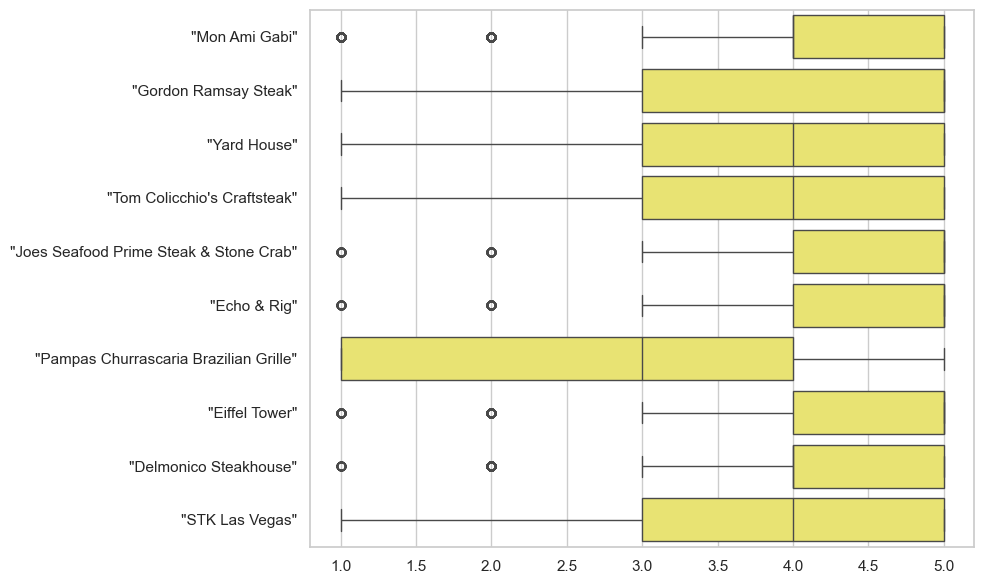

In [432]:
custom_horizontal_boxplot(star_dict, orient='h', color='#FCF55F')

In [27]:
steakhouses.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'categories', 'is_steakhouse', 'is_k1'],
      dtype='object')

In [26]:
steakhouses

business_id                                     name  \
1560    BG8lvZoPTrPJqcvTh-ytzg                   "The Range Steakhouse"   
2203    16Fplxu-OwVmTEFxQAUP4g                 "TENDER Steak & Seafood"   
3874    Wlcl0ITWjyhqCiSlPmSAlg                 "Billy Bob's Steakhouse"   
5034    JPWg9acsCv_om9UFYGMJbA  "Fleming's Prime Steakhouse & Wine Bar"   
6113    cgZOP1ZUBOZmEQMSJ53oiQ                  "Chef Marc's Trattoria"   
...                        ...                                      ...   
170640  F0QPkgrcXx1xBxXT7Htuhg                     "Bally's Steakhouse"   
171061  Dxaz8OxaadecnWol18kAtw                             "Yellowtail"   
171215  vzrcPqSdRY41GoO5DR5pYA                 "Landry's Seafood House"   
171674  aS1qJzTGyluRT2tJ09Jbaw                              "Magal BBQ"   
171949  Mb8qJps-OBFmDALFo5dkJA                 "A Cut Above Restaurant"   

       neighborhood                                     address       city  \
1560      The Strip  "Harrahs Las Vegas, 3475 S Las Vegas Blvd"  Las Vegas   
2203      The Strip                     "3900 Las Vegas Blvd S"  Las Vegas   
3874            NaN                          "5111 Boulder Hwy"  Las Vegas   
5034       Westside                    "8721 W Charleston Blvd"  Las Vegas   
6113      The Lakes                         "8615 W Sahara Ave"  Las Vegas   
...             ...                                         ...        ...   
170640    The Strip                     "3645 Las Vegas Blvd S"  Las Vegas   
171061    The Strip                     "3600 S Las Vegas Blvd"  Las Vegas   
171215          NaN                         "2610 W Sahara Ave"  Las Vegas   
171674    Chinatown                   "4240 Spring Mountain Rd"  Las Vegas   
171949   Centennial                       "2275 Kyle Canyon Rd"  Las Vegas   

       state postal_code   latitude   longitude  stars  review_count  is_open  \
1560      NV       89152  36.118379 -115.172620    4.0           105        0   
2203      NV       89109  36.095356 -115.176614    3.5           421        1   
3874      NV       89122  36.112808 -115.062289    3.0           104        0   
5034      NV       89117  36.158496 -115.285748    4.0           348        1   
6113      NV       89117  36.142969 -115.280103    4.5           187        1   
...      ...         ...        ...         ...    ...           ...      ...   
170640    NV       89109  36.114239 -115.172737    3.5            67        0   
171061    NV       89109  36.113509 -115.175048    3.5           813        1   
171215    NV       89102  36.144997 -115.175625    3.0           262        0   
171674    NV       89102  36.126822 -115.196836    4.5           299        1   
171949    NV       89124  36.325772 -115.328982    2.5            25        1   

                                               categories  is_steakhouse  \
1560                  [restaurants, seafood, steakhouses]           True   
2203    [nightlife, restaurants, steakhouses, bars, am...           True   
3874                           [restaurants, steakhouses]           True   
5034    [nightlife, breakfast & brunch, restaurants, w...           True   
6113         [restaurants, seafood, italian, steakhouses]           True   
...                                                   ...            ...   
170640                         [restaurants, steakhouses]           True   
171061  [steakhouses, restaurants, food, beer, wine & ...           True   
171215  [restaurants, steakhouses, american (tradition...           True   
171674       [barbeque, korean, steakhouses, restaurants]           True   
171949  [american (traditional), steakhouses, restaura...           True   

        is_k1  
1560     True  
2203     True  
3874     True  
5034     True  
6113     True  
...       ...  
170640   True  
171061   True  
171215   True  
171674   True  
171949   True  

[231 rows x 15 columns]

In [9]:
reviews.head(10)

review_id                 user_id             business_id  \
0  9wCte0LxtJUa2_KMbKWh_Q  3wB-JjsUjkvdNUDRnChsVg  BG8lvZoPTrPJqcvTh-ytzg   
1  uwLBF8NDxAZaqy2NV1l7pg  phenxQ1exF-p0HpoUDxazg  BG8lvZoPTrPJqcvTh-ytzg   
2  sE0M3d8qDSb7DLwI2E_crw  C1K9VHWJuBInQTNBEfWqhw  BG8lvZoPTrPJqcvTh-ytzg   
3  fraz4ESqIEugFWx5Xh_N-g  y80788j8cq_WZu3AmR68Gg  BG8lvZoPTrPJqcvTh-ytzg   
4  6bzwXYSs4gh-vOUSVNiRXQ  aENmN1xeXpapt1PjSd55mg  BG8lvZoPTrPJqcvTh-ytzg   
5  brkMxeeRUBpd71qB0k_9DA  DI_UG-rvI0XQkv8fDfBcMQ  BG8lvZoPTrPJqcvTh-ytzg   
6  71ozn-SL-s08SJG0HOY-rQ  JTsLfcY4_HzCASiKHKIpDw  BG8lvZoPTrPJqcvTh-ytzg   
7  Ds_xUbsQW9F-6ThcS3SNnA  upsM463BMYTBZKxpwEonJg  BG8lvZoPTrPJqcvTh-ytzg   
8  qJbNzgS_8Z3aCnrjWO_p6Q  4U380Xqra6lpKWZ6FoO58w  BG8lvZoPTrPJqcvTh-ytzg   
9  4DNUeTCAZNR81omUxdOrGw  WdccGSeguB_TbrZO8okWFA  BG8lvZoPTrPJqcvTh-ytzg   

   stars_x        date                                               text  \
0        3  2012-01-29  I was not expecting much when a coworker chose...   
1        5  2011-02-28  We had an amazing experince. The server was th...   
2        4  2011-06-19  Pleasantly surprised by this place. Once you t...   
3        4  2009-04-09  We had reservations for this place on a Saturd...   
4        1  2012-02-21  wow...for a high end restaurant, this was not ...   
5        2  2010-04-11  Meh, my filet was overcooked, service was slow...   
6        4  2010-01-17  Excellent service! Richard our waiter was frie...   
7        5  2009-09-24  I go to Las Vegas at least 3 times a year. The...   
8        2  2011-07-11  Apparently I should have read the reviews firs...   
9        5  2012-06-09  Definitely stop by Tix4Tonight to get the 50% ...   

   useful  funny  cool                    name  ...   latitude  longitude  \
0       0      1     0  "The Range Steakhouse"  ...  36.118379 -115.17262   
1       0      0     0  "The Range Steakhouse"  ...  36.118379 -115.17262   
2       0      0     0  "The Range Steakhouse"  ...  36.118379 -115.17262   
3       0      1     0  "The Range Steakhouse"  ...  36.118379 -115.17262   
4       0      1     1  "The Range Steakhouse"  ...  36.118379 -115.17262   
5       0      0     0  "The Range Steakhouse"  ...  36.118379 -115.17262   
6       0      0     0  "The Range Steakhouse"  ...  36.118379 -115.17262   
7       0      0     0  "The Range Steakhouse"  ...  36.118379 -115.17262   
8       2      0     0  "The Range Steakhouse"  ...  36.118379 -115.17262   
9       1      0     0  "The Range Steakhouse"  ...  36.118379 -115.17262   

  stars_y review_count is_open                           categories  \
0     4.0          105       0  [restaurants, seafood, steakhouses]   
1     4.0          105       0  [restaurants, seafood, steakhouses]   
2     4.0          105       0  [restaurants, seafood, steakhouses]   
3     4.0          105       0  [restaurants, seafood, steakhouses]   
4     4.0          105       0  [restaurants, seafood, steakhouses]   
5     4.0          105       0  [restaurants, seafood, steakhouses]   
6     4.0          105       0  [restaurants, seafood, steakhouses]   
7     4.0          105       0  [restaurants, seafood, steakhouses]   
8     4.0          105       0  [restaurants, seafood, steakhouses]   
9     4.0          105       0  [restaurants, seafood, steakhouses]   

   is_steakhouse  is_k1  sentiment_score  sentiment_label  
0           True   True         0.421053         positive  
1           True   True         0.400000         positive  
2           True   True         0.195312         positive  
3           True   True         0.000000          neutral  
4           True   True         0.173913         positive  
5           True   True         0.333333         positive  
6           True   True         0.500000         positive  
7           True   True         0.371429         positive  
8           True   True         0.130137         positive  
9           True   True         0.369942         positive  

[10 rows x 25 columns]

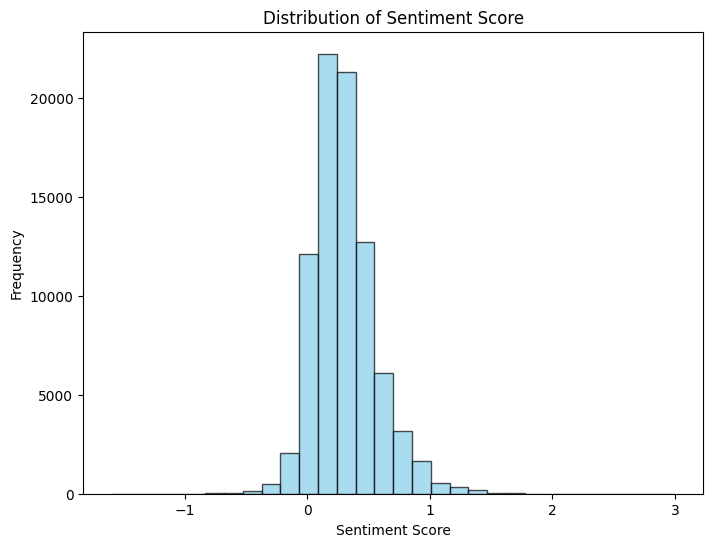

In [138]:
plot_distribution(reviews_steak['sentiment_score'], "Sentiment Score")

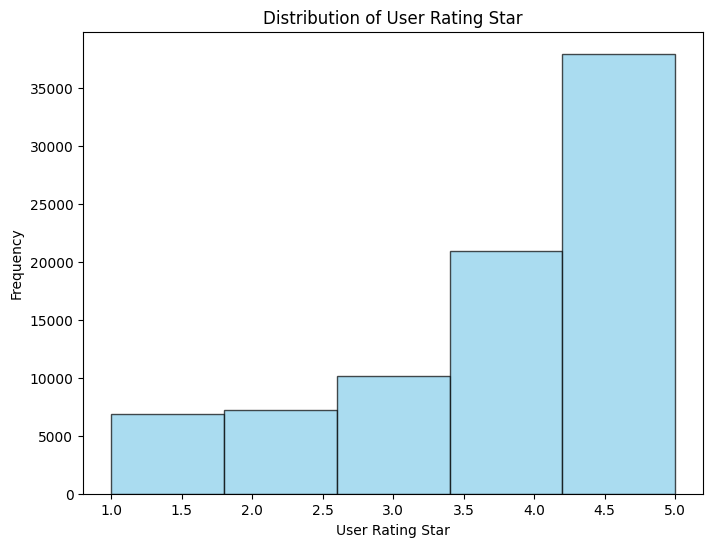

In [167]:
plot_distribution(reviews_steak['stars_x'], "User Rating Star", bin=5)

In [144]:
reviews_steak['sentiment_label'] = reviews_steak['sentiment_score'].apply(categorize_sentiment)

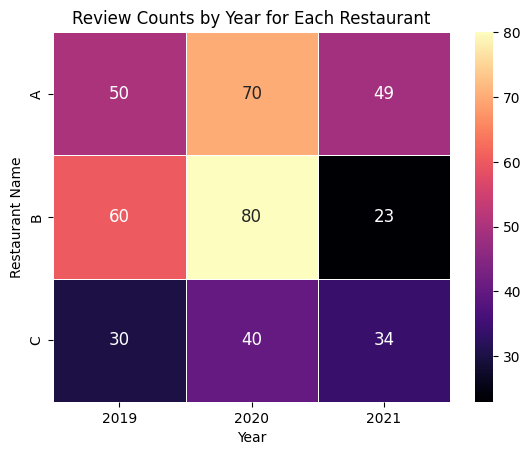

In [158]:
# Square grids plot
data = {
    'RestaurantName': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Year': [2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021],
    'ReviewCount': [50, 60, 30, 70, 80, 40, 49, 23, 34]
}

df = pd.DataFrame(data)

# Pivot the data
pivot_table = df.pivot_table(values='ReviewCount', index='RestaurantName', columns='Year', fill_value=0)
annot_font_size = 12  # Adjust the font size as needed

sns.heatmap(
    pivot_table,
    cmap='magma',
    annot=True,
    linewidths=0.5,
    cbar=True,
    annot_kws={'size': annot_font_size}  # Set the font size for annotations
)

# Customize labels and titles
plt.xlabel('Year')
plt.ylabel('Restaurant Name')
plt.title('Review Counts by Year for Each Restaurant')

# Show the plot
plt.show()


In [20]:
# GOOGLE API with your API key and place ID
api_key = google_api
place_id = 'PLACE_ID_OF_THE_RESTAURANT'

# Define the API endpoint for place details
endpoint = f'https://maps.googleapis.com/maps/api/place/details/json?place_id={place_id}&key={api_key}'

# Make the API request
response = requests.get(endpoint)

# Parse the JSON response
data = response.json()

# Extract restaurant information from the response
restaurant_name = data['result']['name']
restaurant_address = data['result']['formatted_address']
restaurant_phone = data['result']['formatted_phone_number']

# You can extract other information as needed


# DEMO

In [478]:
def plot_stacked_vertical_bar_chart(data, 
                               x_col, y_col1, y_col2, 
                               x_label, y_label,
                               title='',
                               color1='green',color2='orange'):
    """
    Create a stacked vertical bar chart using Seaborn.

    Parameters:
    - data: DataFrame containing the data.
    - x_col: Name of the column for the x-axis (e.g., 'Year').
    - y_col1: Name of the first data column for stacking.
    - y_col2: Name of the second data column for stacking.
    - title: Title of the plot.

    Returns:
    - A Seaborn stacked vertical bar chart.
    """
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    sns.set(style="whitegrid")
    
    # Use the Seaborn barplot function to create the stacked bar chart
    sns.barplot(x=x_col, y=y_col1, data=data, color=color1, label=y_col1)
    sns.barplot(x=x_col, y=y_col2, data=data, color=color2, label=y_col2, bottom=data[y_col1])
    
    # Customize the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Add a legend
    plt.legend(title="", loc="upper left")
    plt.savefig("./demo_plots/stacked_bar_chart.svg", format='svg')
    
    # Show the plot
    plt.show()

def plot_bar_and_line_chart(data, col_bar_y1, col_line_y2, col_x, 
                            y1_label="", y2_label="", x_label="",
                            title="",
                            bar_color="b", line_color="r",
                            figsize=(10, 6)):

    # Extract the years, number of ratings, and average star values from the data
    x = data[col_x]
    bar_y1 = data[col_bar_y1]
    line_y2 = data[col_line_y2]

    # Create a figure and axis for the plot
    fig, ax1 = plt.subplots(figsize=figsize)

    # Bar chart:
    ax1.bar(x=x, height=bar_y1, color=bar_color, alpha=0.5, label=y1_label)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y1_label)
    ax1.tick_params(axis='y')
    
    
    # Create a second y-axis for the line chart
    ax2 = ax1.twinx()

    # Line chart:
    ax2.plot(x, line_y2, color=line_color, marker='o', label=y2_label)
    ax2.set_ylabel(y2_label)
    ax2.grid(visible=False)

    # Add a legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    # Set the title and x-axis label
    plt.title(title)
    plt.xlabel('Year')
    ax2.set_ylim(top=5, bottom=0)
    plt.savefig("./demo_plots/bar_line_chart.svg", format='svg')

    # Show the plot
    plt.show()


def plot_bubble_chart(data, 
                    x_axis, y_axis, 
                    bubble_size, color, 
                    hover_name, 
                    title, size_max=50, 
                    figsize=(1000, 700),
                    color_discrete_sequence=None, 
                    template='plotly', 
                    x_title=None, y_title=None, 
                    color_continuous_scale=None,
                    font_size=12):

    fig = px.scatter(data,
                     x=x_axis,
                     y=y_axis,
                     size=bubble_size,
                     color=color,
                     hover_name=hover_name,
                     hover_data={x_axis: ':.2f', y_axis: True, bubble_size: True},
                     title=title,
                     size_max=size_max,
                     color_discrete_sequence=color_discrete_sequence,
                     template=template,
                     color_continuous_scale=color_continuous_scale)

    # Customize axis titles
    fig.update_layout(
        font=dict(
        family="Helvetica Neue",
        size=font_size,  # Set the font size here
        # color="RebeccaPurple"
    ),
        xaxis_title=x_title if x_title else x_axis,
        yaxis_title=y_title if y_title else y_axis,
    )

    fig.update_layout(legend = dict(font = dict(size = 11)),
                      legend_title = dict(font = dict(size = 11)))
    
    fig.update_layout(
    legend=dict(x=0.5, y=-0.2, xanchor='center', yanchor='top'), # Adjust y to move legend inside subplot
    legend_orientation='h'
)
    # fig.update_layout(width=figsize[0], height=figsize[1], autosize=True)
    fig.update_layout(autosize=True)
    fig.write_html("./demo_plots/bb_chart.html")
    fig.show()


def count_bigrams(df, text_col):
    # Tokenize the text and create bigrams
    bigrams = []
    stop_words = set(stopwords.words('english'))

    for text in df[text_col]:
         # char.isalnum() or
        text = ''.join(char for char in text if char.isalnum() or char.isspace())  # Remove punctuation and special characters
        tokens = nltk.word_tokenize(text.lower())  # Convert text to lowercase and tokenize
        bigrams.extend(list(ngrams(tokens, 2)))

    # Filter out bigrams with stop words
    filtered_bigrams = [bigram for bigram in bigrams if bigram[0] not in stop_words and bigram[1] not in stop_words]

    # Count the occurrences of each unique bigram pair
    bigram_counts = Counter(filtered_bigrams)

    # print(bigram_counts.items())
    # # Create a DataFrame with (word1, word2) and count columns
    w1 = [' '.join(i) for i in list(bigram_counts.keys())]
    w2 = list(bigram_counts.values())
    bigram_df = pd.DataFrame(zip(w1, w2), columns=['word', 'count'])
    # bigram_df['count'] = bigram_df['count']

    # # Sort the DataFrame by count in descending order
    bigram_df = bigram_df.sort_values(by='count', ascending=False).reset_index()

    return bigram_df

In [460]:
"""
Restaurant used: Mastro's Ocean Club
Business ID: GI-CAiZ_Gg3h21PwrANB4Q
"""
reviews['dt_date'] = pd.to_datetime(reviews['date'])
reviews['dt_year'] = reviews['dt_date'].dt.year
reviews['dt_month'] = reviews['dt_date'].dt.month
mastro = reviews.loc[reviews['business_id']=='GI-CAiZ_Gg3h21PwrANB4Q']

## SERVICE QUALITY MONITORING
# Metric 1: Positive & Negative Reviews Trends over Year
pos_reviews = mastro[mastro.stars_x > 3]
neg_reviews = mastro[mastro.stars_x < 3]
count_pos_reviews = pos_reviews[['dt_year', 'stars_x']].groupby(['dt_year']).agg('count')
count_neg_reviews = neg_reviews[['dt_year', 'stars_x']].groupby(['dt_year']).agg('count')
count_pos_reviews.rename(columns={'stars_x': "pos_counts"}, inplace=True)
count_neg_reviews.rename(columns={'stars_x': "neg_counts"}, inplace=True)
count_reviews = count_pos_reviews.merge(count_neg_reviews, on='dt_year', how='outer')

# Metric 2: Average Number of Star Ratings (Yelp) over Year
star_avg = mastro[['dt_year', 'stars_x']].groupby(['dt_year']).agg('mean')
star_avg.rename(columns={'stars_x': "star_avg"}, inplace=True)
num_ratings = mastro[['dt_year', 'stars_x']].groupby(['dt_year']).agg('count')
num_ratings.rename(columns={'stars_x': "num_ratings"}, inplace=True)
num_ratings_with_avg = num_ratings.merge(star_avg, on='dt_year', how='outer')
num_ratings_with_avg['dt_year'] = num_ratings_with_avg.index

# Metric 3: Top 5 Most Frequent Phrases in Positive & Negative Reviews (Yelp)
# bi-gram model: 
bigram_neg = count_bigrams(neg_reviews, 'text')
bigram_pos = count_bigrams(pos_reviews, 'text')
bigram_neg.reset_index(inplace=True)
bigram_pos.reset_index(inplace=True)

# Metric 4: Top 10 Positive & 10 Negative Reviews based on Commmunity Feedback

# top_pos_reviews = mastro.sort_values(by='stars_x')
# top_neg_reviews = mastro.sort_values()
## Use sentiment analysis


## COMPETITION BENCHMARKING
# Metric: Yelp/Google Average Star Rating
top_7_num_reviewed = reviews[['name']].value_counts().head(7)

# top_10_num_reviewed = [i[0].strip('"') for i in top_10_num_reviewed.index]
top_7_num_reviewed = [i[0] for i in top_7_num_reviewed.index]

bb_chart = {
    'Restaurant': [],
    'Average_Star_Rating': [],
    'Number_of_Reviews': [],
    'Years_of_Operation': []
}
for r in top_7_num_reviewed:
    bb_chart['Restaurant'].append(r)
    data = reviews.loc[reviews['name'] == r]
    avg_rating = sum(data['stars_x'])/len(data['stars_x'])
    bb_chart['Average_Star_Rating'].append(round(avg_rating, 3))

    num_rev = len(data['stars_x'])
    bb_chart['Number_of_Reviews'].append(num_rev)

    year_op = max(data.dt_year) - min(data.dt_year)
    bb_chart['Years_of_Operation'].append(year_op)

# Metric: Top 5 most Positive/Negative popular keywords for a set of restaurant

# Metric: Top 5 most Positive/Negative popular keywords for a set of restaurant


In [467]:
# import plotly.graph_objects as go

# def plot_bar_and_line_chart(data, col_bar_y1, col_line_y2, col_x, 
#                             y1_label="", y2_label="", x_label="",
#                             title="",
#                             bar_color="b", line_color="r",
#                             figsize=(800, 500), save_filename="bar_and_line_chart.html"):

#     # Create traces for bar and line
#     trace_bar = go.Bar(x=data[col_x], y=data[col_bar_y1], name=y1_label, marker=dict(color=bar_color))
#     trace_line = go.Scatter(x=data[col_x], y=data[col_line_y2], mode='lines+markers', name=y2_label, line=dict(color=line_color))

#     # Create layout
#     layout = go.Layout(title=title, xaxis=dict(title=x_label), yaxis=dict(title=y1_label), yaxis2=dict(title=y2_label, overlaying='y', side='right'))

#     # Create figure
#     fig = go.Figure(data=[trace_bar, trace_line], layout=layout)

#     # Save the chart as an HTML file
#     fig.write_html(save_filename, auto_open=False)

#     # Show the chart
#     fig.show()

# Example usage:
# plot_bar_and_line_chart(data=df, col_bar_y1='num_ratings', col_line_y2='star_avg', col_x='dt_year',
#                         y1_label="Number of Ratings", y2_label="Average Star Rating", x_label="Year",
#                         title="Ratings and Star Ratings Over the Years", bar_color="blue", line_color="red")


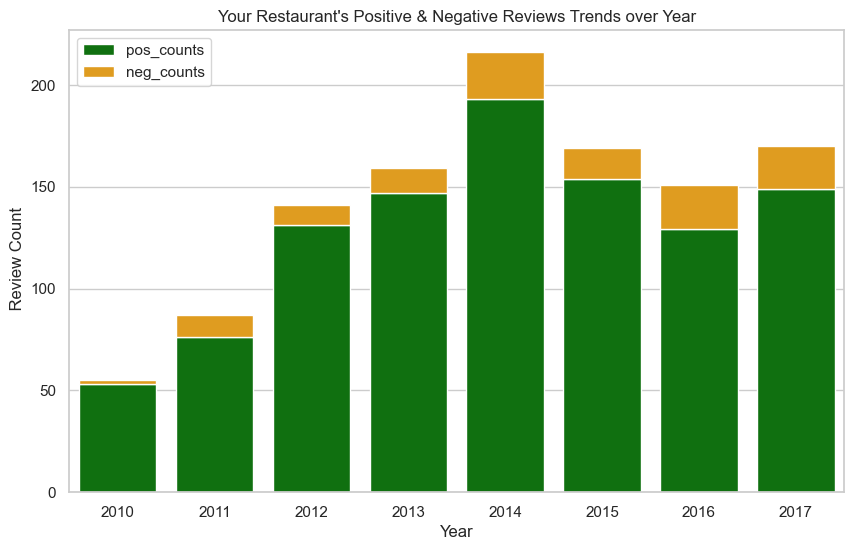

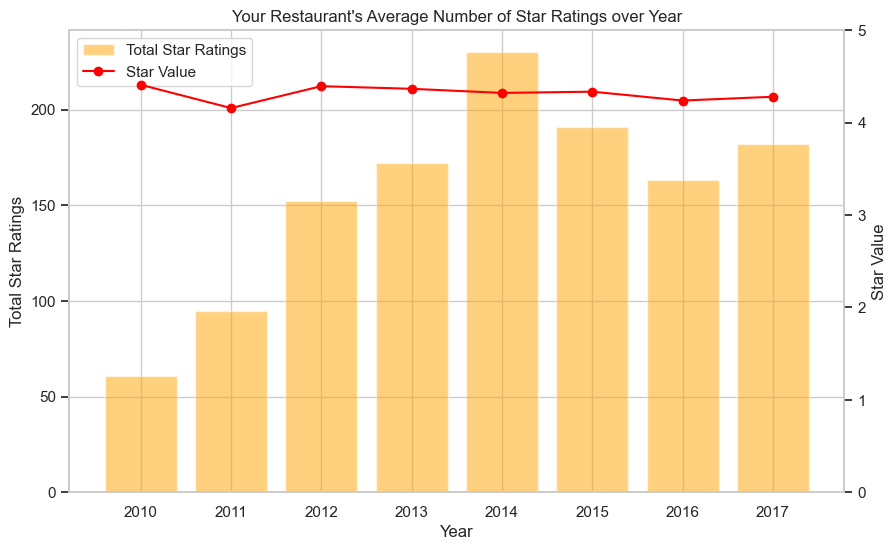

word  count
0     mashed potatoes     19
1         medium rare     17
2         butter cake     16
3            sea bass     13
4      lobster mashed     12
5         much better     11
6           well done     11
7           las vegas     10
8          ocean club     10
9            ahi tuna      9
10      beverly hills      9
11        tasted like      8
12  dining experience      8
13        chilean sea      8
14         didnt want      7
15  made reservations      7
16         20 minutes      7
17         didnt even      7
18    chilean seabass      6
19     gorgonzola mac      6

word  count
0         butter cake    366
1     mashed potatoes    230
2      lobster mashed    166
3            sea bass    161
4          ocean club    115
5          tree house    108
6           las vegas    105
7         warm butter    105
8            ive ever    100
9         chilean sea     77
10  dining experience     76
11      whipped cream     76
12          next time     71
13      seafood tower     71
14        medium rare     70
15      mastros ocean     67
16          king crab     62
17       bread basket     61
18     lobster bisque     61
19   highly recommend     58

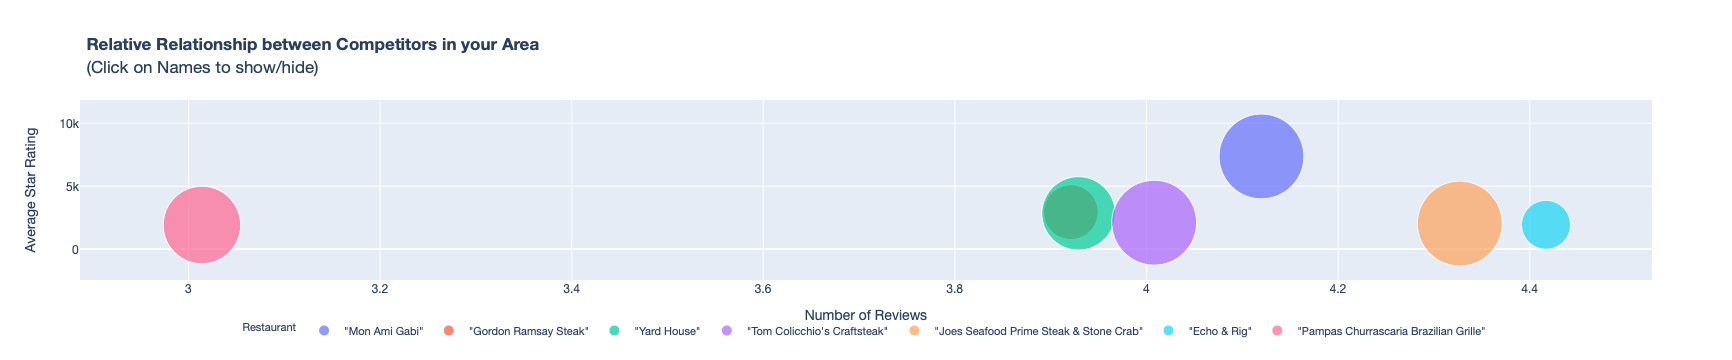

In [479]:
# Metric 1: Positive & Negative Reviews Trends over Year
plot_stacked_vertical_bar_chart(count_reviews, 
                           x_col="dt_year", y_col1="pos_counts", y_col2="neg_counts",
                           x_label='Year', y_label=' Review Count',
                           title="Your Restaurant's Positive & Negative Reviews Trends over Year")

# Metric 2: Average Number of Star Ratings (Yelp) over Year
plot_bar_and_line_chart(data=num_ratings_with_avg, 
                        col_bar_y1='num_ratings', col_line_y2='star_avg', col_x='dt_year', 
                        y1_label="Total Star Ratings", y2_label="Star Value", x_label="Year",
                        title="Your Restaurant's Average Number of Star Ratings over Year",
                        bar_color="orange", line_color="red")

# Metric 3: Top 5 Most Frequent Phrases in Positive & Negative Reviews (Yelp)
display(bigram_neg[['word', 'count']].head(20))
display(bigram_pos[['word', 'count']].head(20))

# Metric 4: Top 10 Positive & 10 Negative Reviews based on Commmunity Feedback



## COMPETITION BENCHMARKING
# Metric: Yelp/Google Average Star Rating
plot_bubble_chart(bb_chart,
                 x_axis='Average_Star_Rating',
                 y_axis='Number_of_Reviews',
                 x_title='Number of Reviews', y_title='Average Star Rating',
                 bubble_size='Years_of_Operation',
                 color='Restaurant',
                 hover_name='Restaurant',
                 title=' <b> Relative Relationship between Competitors in your Area </b>  <br> (Click on Names to show/hide)',
                 size_max=60,
                font_size=12)

# Metric: Top 5 most Positive/Negative popular keywords for a set of restaurant

# Metric: Top 5 most Positive/Negative popular keywords for a set of restaurant


# MACRO-LEVEL LANDSCAPE IN MVP 1: RESTAURANTS IN LAS VEGAS

**Q1: What are the distribution of service types in Las Vegas** 

In [147]:
lv_macro_data = business[business['city'] == 'Las Vegas']

In [154]:
lv_macro_data['categories']

6         [Real Estate Services, Real Estate, Home Servi...
7                                [Shopping, Sporting Goods]
26        [Shopping, Jewelry, Watch Repair, Local Services]
41        [Home Services, Lighting Fixtures & Equipment,...
48         [Nurseries & Gardening, Home & Garden, Shopping]
                                ...                        
174539    [Real Estate Services, Home Services, Property...
174545                                 [Coffee & Tea, Food]
174546    [Mobile Phone Accessories, Mobile Phones, Elec...
174552    [Martial Arts, Sports Wear, Men's Clothing, Sp...
174556                           [Beauty & Spas, Skin Care]
Name: categories, Length: 26775, dtype: object